## Ensemble Techniques

Ensemble techniques are an extremely popular set of algorithms which involves combining multiple base learners to create a hybrid model. This hybrid model performs better than any of it's constituent learners. The set up of the jupyter notebook is as follows:

1) Preprocessing: The data provided needs to cleaned before being fed into any classifier. The data is more or else clean from the start. However, proper precautions must be taken to avoid missing or NaN values. In this notebook, the range of values is re-calibrated to be between 0-1. Use df.fillna() to handle missing values.

2) Bagging(DT/RF): Bagging is the process of creating sub-divisions of the dataset randomly and apply basis functions on them. The final result is obtained by aggregating the individual results. Both decision trees and random forests are easy basis functions as visual comprehension of dividing the data is feasible. 

3) AdaBoost: AdaBoost is a meta-heuristic responsible for taking multiple weak basis functions and aggregating them into a overall strong classifier. In this solution n_estimators specify the number of models being trained. The overall measure-of-goodness is a measure of minimizing the exponential loss function.

4) GradientBoost: This is a generalized form of AdaBoost which provides a set of loss function to chose from.

5) XGBoost: It is similar to GradientBoosting, with the inclusion of Lasso and Ridge regularization techniques.

6) Setting hyperparameters: In all of the above techniques, the hyperparameters were set either as standard or after careful off-the-books consideration. However, how will we know which particular setting gives the best performance? For this, a set of parameters were appended in a list and the models were made to run on all of those combinations. A light version of Gradient Boosting (LGBM) is also included here. Cross-validation is conducted in a different way in this step, by considering all configurations in steps of 5.

7) Stacking: This involves training multiple models and combining them for better results from an optimal combination of multiple basis functions. 

# Importing Libraries

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import itertools

# Preprocessing


In [2]:
#read data
df = pd.read_csv("../data/breast_cancer_diagnosis.csv")
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

cols = X.columns

In [3]:
#scales data to be between 0-1
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [4]:
X.columns = cols

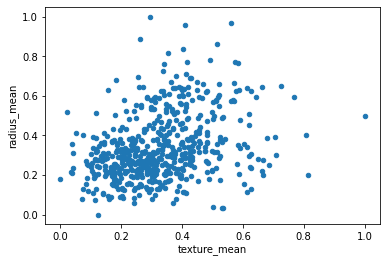

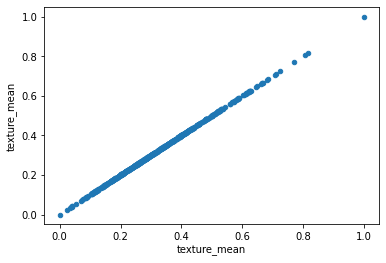

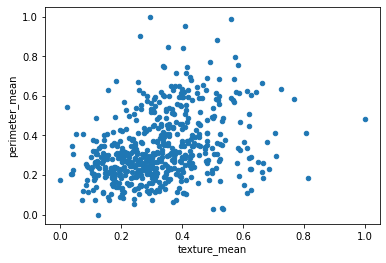

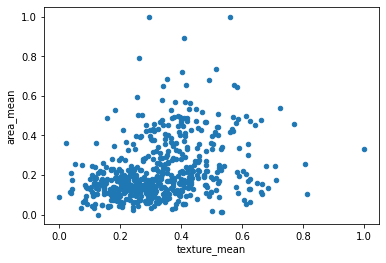

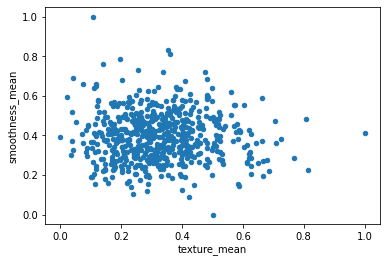

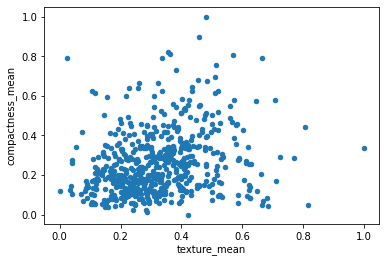

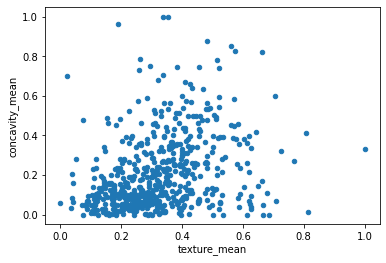

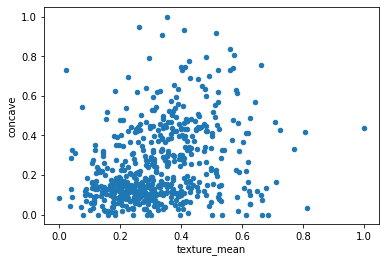

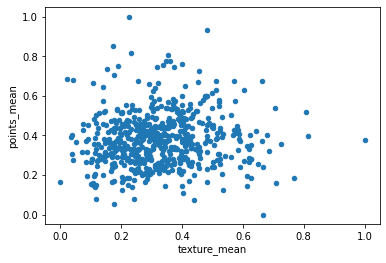

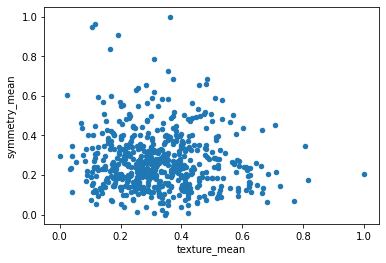

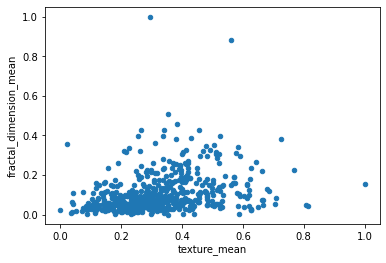

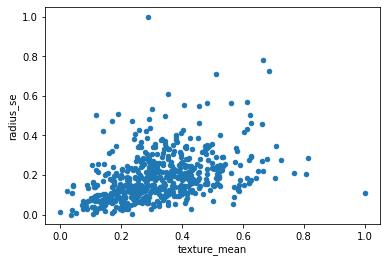

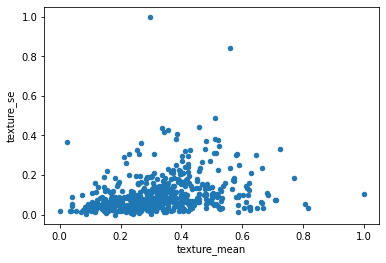

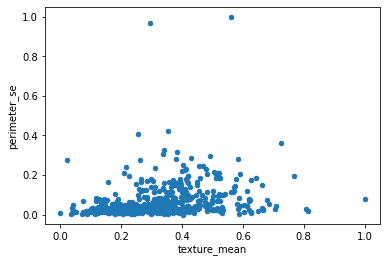

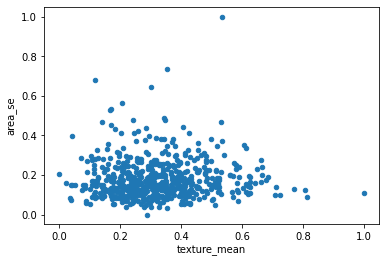

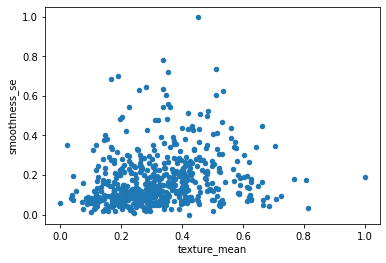

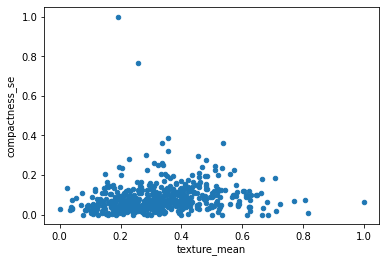

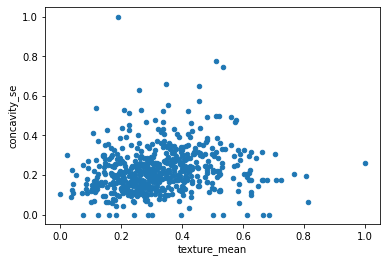

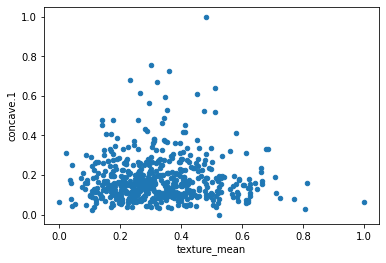

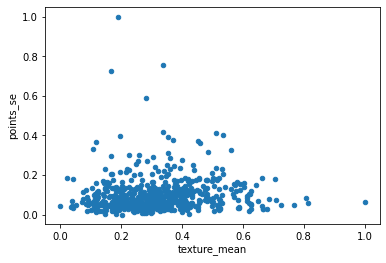

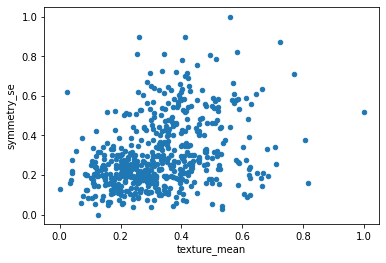

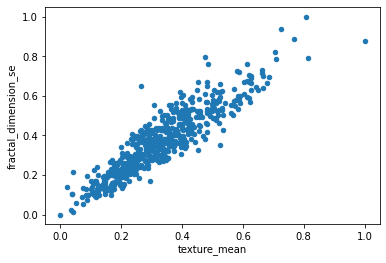

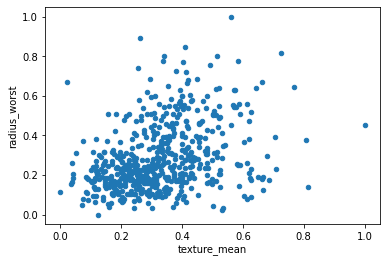

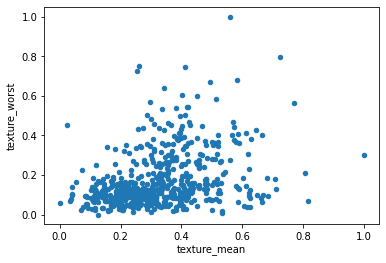

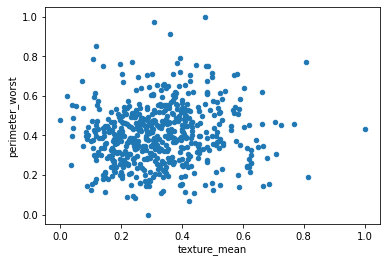

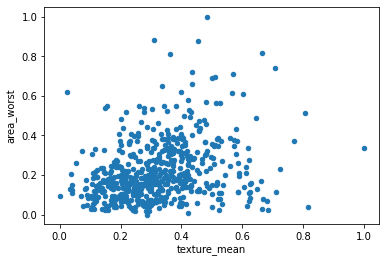

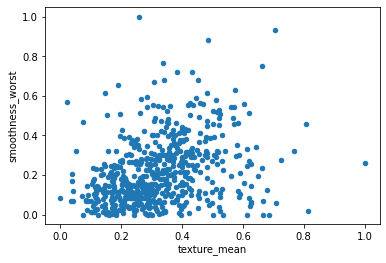

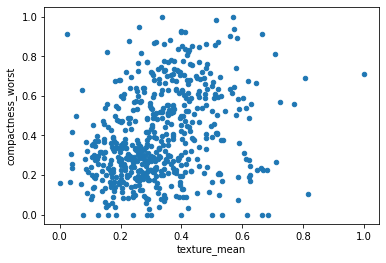

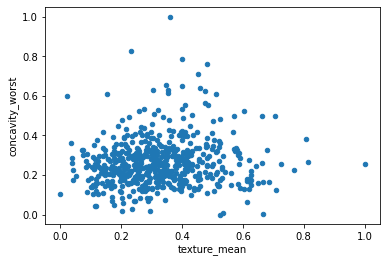

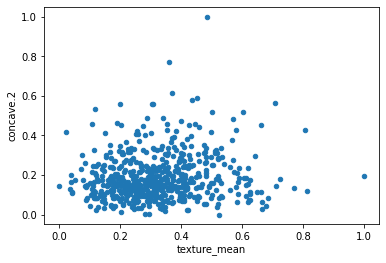

In [5]:
#plotting the relation between each feature with texture as anchor
cols = list(X.columns)
for i in cols:
    X.plot.scatter(x = 'texture_mean', y = i)

# Bagging (Decision Tree)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=50)
#creating bagging classifier with base estimator as a decision tree
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
#training it on training data and labels
bag.fit(X_train, y_train)
#getting predictions
y_pred = bag.predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("Balanced decision tree's accuracy is : ", acc)

#same process with the exception of using a balanced bagging classifier
balanced_bag = BalancedBaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
balanced_bag.fit(X_train,y_train)

by_pred = balanced_bag.predict(X_test)
bacc = balanced_accuracy_score(y_test,by_pred)

print("Balanced Bagged Decision Tree Classifier's accuracy is ", bacc)

Balanced decision tree's accuracy is :  0.9477905569007263
Balanced Bagged Decision Tree Classifier's accuracy is  0.9518008474576272


# Bagging (Random Forest)

In [7]:
#same process as before
forest = RandomForestClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
bag.fit(X_train, y_train)


y_pred = bag.predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("Balanced random forest's accuracy is : ", acc)

balanced_bag = BalancedBaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
balanced_bag.fit(X_train,y_train)

by_pred = balanced_bag.predict(X_test)
bacc = balanced_accuracy_score(y_test,by_pred)

print("Balanced Bagged Random Forest Classifier's accuracy is ", bacc)

Balanced random forest's accuracy is :  0.9477905569007263
Balanced Bagged Random Forest Classifier's accuracy is  0.9518008474576272


# Ada Boost

In [8]:
#use the make_moons dataset for easier plotting. 
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#this function takes in the data and it's labels and uses ListedColormap to plot the decision boundary
#refer to matplotlib documentation for further details
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [10]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
print("AdaBoost's accuracy is ", metrics.accuracy_score(y_test, ada_pred))

AdaBoost's accuracy is  0.896


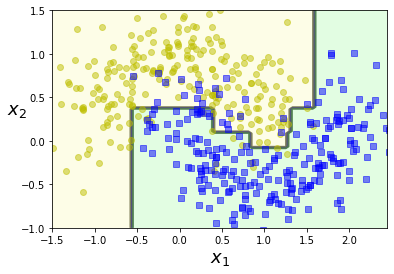

In [11]:
plot_decision_boundary(ada_clf, X, y)

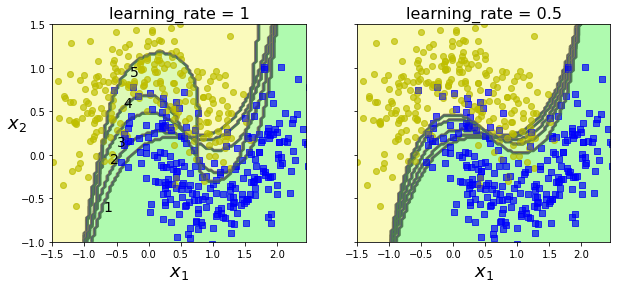

In [12]:
m = len(X_train)
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

# Gradient Boosting

In [14]:
#reverting to original dataset
df = pd.read_csv('../data/breast_cancer_diagnosis.csv')
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

gbrt = GradientBoostingClassifier(max_depth=10, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
gbrt_pred = gbrt.predict(X_test)
preds = []

print('Accuracy of Gradient Booster')
print(metrics.accuracy_score(gbrt_pred, y_test))

Accuracy of Gradient Booster
0.856


# XG Boosting

In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 87.20


# Setting Hyperparameters

In [16]:

#this function uses a grid search which preprocesses the data by minimizing the MSE
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       scoring_test=r2_score, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    score = scoring_test(y_test_data, pred)
    
    return [best_model, pred, score]


In [17]:
models_to_train = [XGBRegressor(), LGBMRegressor(), RandomForestRegressor()]
#create a set of possible configurations related to the hyperparameters and iterates through them
grid_parameters = [
    { 
        'n_estimators': [400, 700, 1000],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [15,20,25],
        'reg_alpha': [1.1, 1.2, 1.3],
        'reg_lambda': [1.1, 1.2, 1.3],
        'subsample': [0.7, 0.8, 0.9]
    },
    {
        'n_estimators': [400, 700, 1000],
        'learning_rate': [0.12],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [4],
        'num_leaves': [10, 20],
        'reg_alpha': [1.1, 1.2],
        'reg_lambda': [1.1, 1.2],
        'min_split_gain': [0.3, 0.4],
        'subsample': [0.8, 0.9],
        'subsample_freq': [10, 20]
    }, 
    { 
        'max_depth':[3, 5, 10, 13], 
        'n_estimators':[100, 200, 400, 600, 900],
        'max_features':[2, 4, 6, 8, 10]
    }
]


In [18]:
models_preds_scores = []
#the model's scores are noted and the best performance is displayed
for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(X_train, X_test, y_train, y_test, 
                                 model, params, cv=5)
    models_preds_scores.append(result)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [19]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2]))


Model: XGBRegressor, Score: 0.5596337212395259
Model: LGBMRegressor, Score: 0.6878706823345859
Model: RandomForestRegressor, Score: 0.7270511241232007


# Stacking

In [20]:
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

In [21]:

sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [22]:
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "Stack": sclf}

In [23]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [24]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

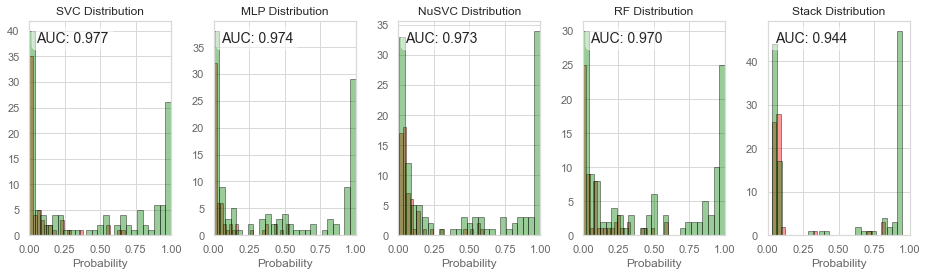

In [25]:
import seaborn as sns

sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [26]:
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The AUC of the tuned Stacking classifier is 0.979


In [ ]:
classifier_labels = ["SVC", "MLP", "NuSVC", "RF"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 5,
                                meta_classifier = SVC(probability = True),
                                n_jobs = -1)
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 5,
                        scoring = "roc_auc",
                        verbose = 0,
                        n_jobs = -1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

AUC of stack ('SVC', 'MLP'): 0.979
AUC of stack ('SVC', 'NuSVC'): 0.979
